In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [90]:
# Create an empty dataframe to store the faculty information
df = pd.DataFrame(columns=['Faculty Member', 'Ph.D.', 'Masters', 'Bachelors'])

for pgnum in [0,1,2]:
    url = f'https://mse.washington.edu/facultyfinder?page={pgnum}'
    # Loop through each row in the table and extract the faculty information
    for row in table.find_all('tr'):
        columns = row.find_all('td')
        
        # Check if the row contains faculty information
        if len(columns) != 0:
            # Extract the faculty member's name and personal page link
            name = columns[1].text.strip('\n').splitlines()[0]
            link = columns[1].find('a')['href']
            
            # Send a GET request to the faculty member's personal page
            response = requests.get(link)
            
            # Parse the HTML response with Beautiful Soup
            soup = BeautifulSoup(response.content, 'html.parser')
            
            # Find the education section of the faculty member's personal page
            education_section = soup.find('h2', text='Education')
            
            # If the education section exists, extract the education data
            if education_section is not None:
                education_section = education_section.find_next_sibling()
                
                # Split the education data by newline characters and remove empty strings
                education_data = [d.strip() for d in education_section.text.strip().split('\n') if d.strip()]
                
                # Loop through each education record and categorize it
                phd = ''
                masters = ''
                bachelors = ''
                for data in education_data:
                    if ('Ph.D.' or 'PhD') in data:
                        phd += data.split(',')[1] + ', '
                    elif ('M.S.' or 'Master' or 'MS' or 'MEng' or 'M.E.') in data:
                        masters += data.split(',')[1] + ', '
                    elif 'B.S.' in data or 'B.A.' in data:
                        bachelors += data.split(',')[1] + ', '
                
                # Remove trailing commas
                phd = phd.strip(', ')
                masters = masters.strip(', ')
                bachelors = bachelors.strip(', ')
            else:
                phd = 'Not available'
                masters = 'Not available'
                bachelors = 'Not available'
            
            # Add the faculty member's name and education data to the dataframe
            df = df.append({'Faculty Member': name, 'Ph.D.': phd, 'Masters': masters, 'Bachelors': bachelors}, ignore_index=True)

# Print the resulting dataframe
print(df)

C:\Users\profe\AppData\Local\Temp\ipykernel_32808\2228186336.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Faculty Member': name, 'Ph.D.': phd, 'Masters': masters, 'Bachelors': bachelors}, ignore_index=True)
C:\Users\profe\AppData\Local\Temp\ipykernel_32808\2228186336.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Faculty Member': name, 'Ph.D.': phd, 'Masters': masters, 'Bachelors': bachelors}, ignore_index=True)
C:\Users\profe\AppData\Local\Temp\ipykernel_32808\2228186336.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Faculty Member': name, 'Ph.D.': phd, 'Masters': masters, 'Bachelors': bachelors}, ignore_index=True)
C:\Users\profe\AppData\Local\Temp\ipy

                       Faculty Member                                 Ph.D.  \
0                       Arola, Dwayne                Mechanical Engineering   
1                     Barnard, Arthur                                         
2                       Brush, Lucien           Carnegie Mellon University.   
3                       Cao, Guozhong    Eindhoven University of Technology   
4                           Cao, Ting  University of California at Berkeley   
5                        Hinds, Bruce                   Inorganic Chemistry   
6                     Huang, Luna Yue              University of Washington   
7                        Idrobo, Juan        University of California Davis   
8                       Arola, Dwayne                Mechanical Engineering   
9                     Barnard, Arthur                                         
10                      Brush, Lucien           Carnegie Mellon University.   
11                      Cao, Guozhong    Eindhoven U

C:\Users\profe\AppData\Local\Temp\ipykernel_32808\2228186336.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Faculty Member': name, 'Ph.D.': phd, 'Masters': masters, 'Bachelors': bachelors}, ignore_index=True)


In [91]:
df['Ph.D.'].describe()

count                         24
unique                         8
top       Mechanical Engineering
freq                           3
Name: Ph.D., dtype: object

In [3]:
df = pd.DataFrame(columns=['Faculty Member', 'Ph.D.', 'Masters', 'Bachelors'])

for pgnum in [0,1,2,3,4,5]:
    url = f'https://www.me.washington.edu/facultyfinder?page={pgnum}'
    # Send a GET request to the faculty finder page
    response = requests.get(url)
    
    # Parse the HTML response with Beautiful Soup
    soup = BeautifulSoup(response.content, 'html.parser')
    table = soup.find_all('table')[-1]
    
    # Verifying tables and their classes
    # print('Classes of each table:')
    # for table in soup.find_all('table'):
    #     print(table.get('class'))
    
    
    # Loop through each row in the table and extract the faculty information
    for row in table.find_all('tr'):
        columns = row.find_all('td')
        
        # Check if the row contains faculty information
        if len(columns) != 0:
            # Extract the faculty member's name and personal page link
            name = columns[1].text.strip('\n').splitlines()[0]
            link = columns[1].find('a')['href']
            
            # Send a GET request to the faculty member's personal page
            response = requests.get(link)
            
            # Parse the HTML response with Beautiful Soup
            soup = BeautifulSoup(response.content, 'html.parser')
            
            # Find the education section of the faculty member's personal page
            education_section = soup.find('h2', text='Education')
            
            # If the education section exists, extract the education data
            if education_section is not None:
                education_section = education_section.find_next_sibling()
                
                # Split the education data by newline characters and remove empty strings
                education_data = [d.strip() for d in education_section.text.strip().split('\n') if d.strip()]
                
                # Loop through each education record and categorize it
                phd = ''
                masters = ''
                bachelors = ''
                for data in education_data:
                    if 'Ph.D.' in data or 'PhD' in data:
                        try:
                            phd += data.split(',')[1] + ', '
                        except IndexError:
                            phd += 'Issue'
                    elif 'M.S.' in data or 'Master' in data or 'MS' in data or 'MEng' in data or 'M.E.' in data:
                        try:
                            masters += data.split(',')[1] + ', '
                        except IndexError:
                            masters += 'Issue'
                    elif 'B.S.' in data or 'B.A.' in data:
                        try:
                            bachelors += data.split(',')[1] + ', '
                        except IndexError:
                            bachelors += 'Issue'
                
                # Remove trailing commas
                phd = phd.strip(', ')
                masters = masters.strip(', ')
                bachelors = bachelors.strip(', ')
            else:
                phd = 'Not available'
                masters = 'Not available'
                bachelors = 'Not available'
            
            # Add the faculty member's name and education data to the dataframe
            df = df.append({'Faculty Member': name, 'Ph.D.': phd, 'Masters': masters, 'Bachelors': bachelors}, ignore_index=True)

# Print the resulting dataframe
# print(df)

C:\Users\profe\AppData\Local\Temp\ipykernel_11736\2041172306.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Faculty Member': name, 'Ph.D.': phd, 'Masters': masters, 'Bachelors': bachelors}, ignore_index=True)
C:\Users\profe\AppData\Local\Temp\ipykernel_11736\2041172306.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Faculty Member': name, 'Ph.D.': phd, 'Masters': masters, 'Bachelors': bachelors}, ignore_index=True)
C:\Users\profe\AppData\Local\Temp\ipykernel_11736\2041172306.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Faculty Member': name, 'Ph.D.': phd, 'Masters': masters, 'Bachelors': bachelors}, ignore_index=True)
C:\Users\profe\AppData\Local\Temp\ipy

In [104]:
df.to_csv(path_or_buf='./me.csv')

In [10]:
uniq = df['Ph.D.'].describe().unique()
print(uniq) 

[42 24 'University of Washington' 7]


<AxesSubplot:>

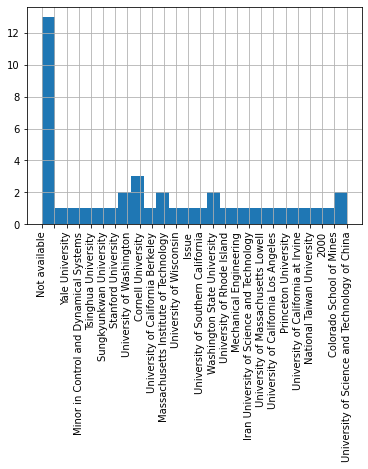

In [11]:
df['Bachelors'].hist(xrot=90,bins=uniq[1])